In [1]:
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


In [2]:
file_path = "Lung Cancer Dataset.csv"
data = pd.read_csv(file_path)
data

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32,0,1,1,0,0,1,60.700696,1,1,1,1,94.012495,0,1,1,0,YES
4996,80,0,1,1,1,1,1,50.751741,0,1,1,1,94.394968,0,0,0,0,YES
4997,51,1,0,0,1,0,0,61.063496,1,0,0,0,98.108901,0,0,0,1,NO
4998,76,1,0,1,0,0,0,48.662872,0,1,0,1,95.577773,1,0,0,0,NO


In [3]:
data.isnull().sum()


AGE                       0
GENDER                    0
SMOKING                   0
FINGER_DISCOLORATION      0
MENTAL_STRESS             0
EXPOSURE_TO_POLLUTION     0
LONG_TERM_ILLNESS         0
ENERGY_LEVEL              0
IMMUNE_WEAKNESS           0
BREATHING_ISSUE           0
ALCOHOL_CONSUMPTION       0
THROAT_DISCOMFORT         0
OXYGEN_SATURATION         0
CHEST_TIGHTNESS           0
FAMILY_HISTORY            0
SMOKING_FAMILY_HISTORY    0
STRESS_IMMUNE             0
PULMONARY_DISEASE         0
dtype: int64

In [4]:
data['PULMONARY_DISEASE'].unique()

array(['NO', 'YES'], dtype=object)

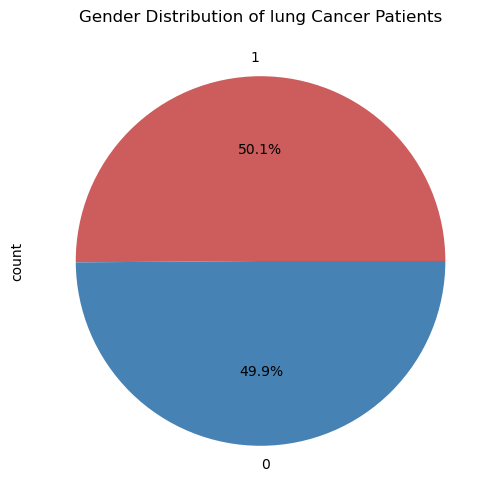

In [5]:
plt.figure(figsize=(6, 6))
data["GENDER"].value_counts().plot.pie(autopct="%1.1f%%", colors=["indianred","steelblue"])
plt.title("Gender Distribution of lung Cancer Patients")
plt.show()

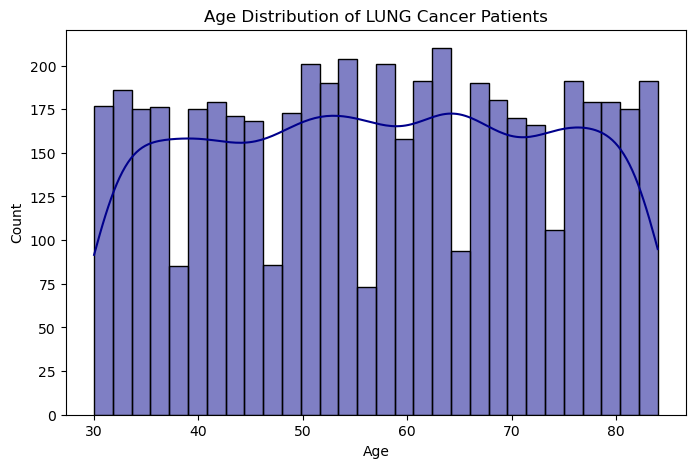

In [6]:
# Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data["AGE"], bins=30, kde=True, color="darkblue")
plt.title("Age Distribution of LUNG Cancer Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

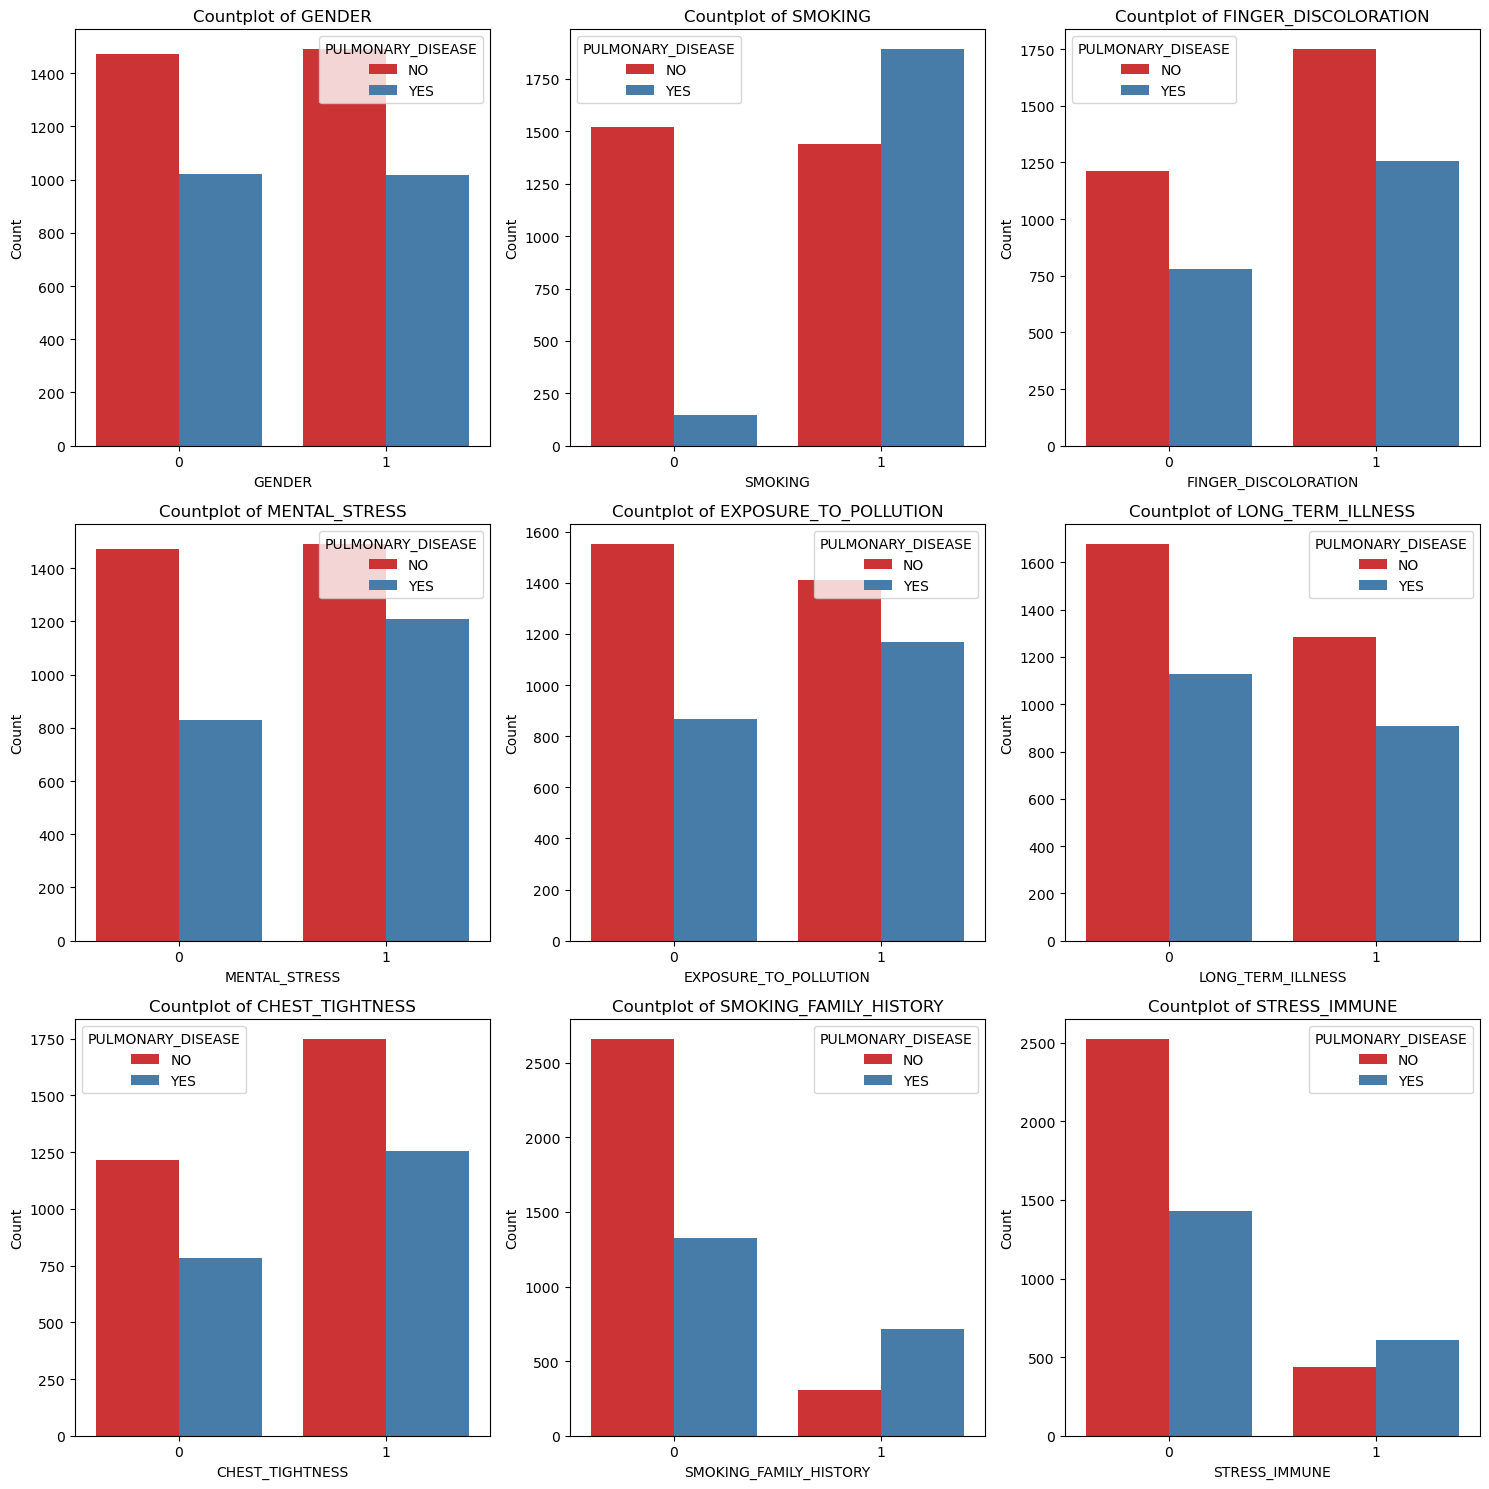

In [7]:

cols = ['GENDER','SMOKING','FINGER_DISCOLORATION','MENTAL_STRESS',
        'EXPOSURE_TO_POLLUTION','LONG_TERM_ILLNESS','CHEST_TIGHTNESS',
        'SMOKING_FAMILY_HISTORY','STRESS_IMMUNE']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flatten() 

palette = 'Set1'
for i, feature in enumerate(cols):
    sns.countplot(x=feature, hue='PULMONARY_DISEASE', data=data, ax=axes[i],palette=palette)
    axes[i].set_title(f'Countplot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')


plt.tight_layout()
plt.show()


In [8]:
label_encoders = {}
for column in data.columns:
    if data[column].dtype == "object":
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

In [9]:
x = data.drop('PULMONARY_DISEASE', axis=1)
y = data['PULMONARY_DISEASE']
x

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32,0,1,1,0,0,1,60.700696,1,1,1,1,94.012495,0,1,1,0
4996,80,0,1,1,1,1,1,50.751741,0,1,1,1,94.394968,0,0,0,0
4997,51,1,0,0,1,0,0,61.063496,1,0,0,0,98.108901,0,0,0,1
4998,76,1,0,1,0,0,0,48.662872,0,1,0,1,95.577773,1,0,0,0


In [10]:
y


0       0
1       1
2       0
3       1
4       1
       ..
4995    1
4996    1
4997    0
4998    0
4999    0
Name: PULMONARY_DISEASE, Length: 5000, dtype: int32

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)


In [12]:
model = GaussianNB()
model.fit(x_train, y_train)


GaussianNB()

In [13]:
model.score(x_test, y_test)

0.8533333333333334

In [14]:
y_pred = model.predict(x_test)

In [15]:
conf_matrix = confusion_matrix(y_test, y_pred)


target_names = label_encoders['PULMONARY_DISEASE'].classes_.astype(str)

class_report = classification_report(y_test, y_pred, target_names=target_names)

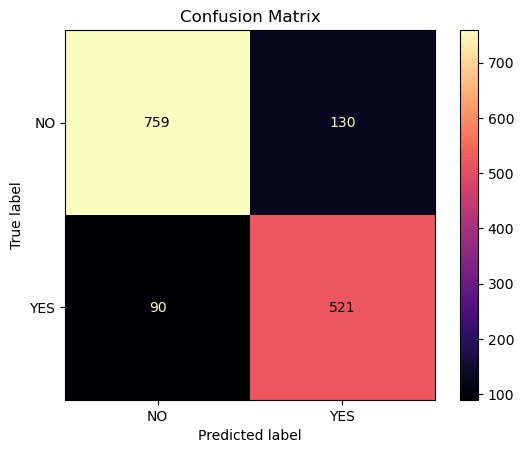

In [16]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoders['PULMONARY_DISEASE'].classes_)
disp.plot(cmap='magma', values_format='d')
plt.title("Confusion Matrix")
plt.show()

In [17]:
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

          NO       0.89      0.85      0.87       889
         YES       0.80      0.85      0.83       611

    accuracy                           0.85      1500
   macro avg       0.85      0.85      0.85      1500
weighted avg       0.86      0.85      0.85      1500



In [40]:
feature_names = x.columns.tolist()

In [86]:
root = tk.Tk()
root.title("Lung Predicion Cancer")
entries = {}

In [87]:
FONT = ("Helvetica", 12,'bold ') 
FONT2 = ("Arial", 10) 

feature_names = ['age','GENDER','SMOKING','FINGER_DISCOLORATION','MENTAL_STRESS',
                 'EXPOSURE_TO_POLLUTION','LONG_TERM_ILLNESS','ENERGY_LEVEL',
                 'IMMUNE_WEAKNESS','BREATHING_ISSUE','ALCOHOL_CONSUMPTION',
                 'THROAT_DISCOMFORT','OXYGEN_SATURATION','CHEST_TIGHTNESS',
                 'FAMILY_HISTORY','SMOKING_FAMILY_HISTORY','STRESS_IMMUNE']

for idx, feature in enumerate(feature_names):
    row = idx // 2
    col = (idx % 2) * 2
    root.config(bg="black")
    label = tk.Label(root, text=feature, font=FONT,bg="white")
    label.grid(row=row, column=col, padx=10, pady=8, sticky='e')

    if feature.upper() in ["AGE", "ENERGY_LEVEL", "OXYGEN_SATURATION"]:
        entry = tk.Entry(root, font=FONT2, width=20)
        entry.grid(row=row, column=col + 1, padx=10, pady=8)
        entry.insert(0, "Enter a number")
        entry.config(fg='grey')

        def focus_in(event, e=entry):
            if e.get() == "Enter a number":
                e.delete(0, 'end')
                e.config(fg='black')

        def focus_out(event, e=entry):
            if not e.get():
                e.insert(0, "Enter a number")
                e.config(fg='grey')

        entry.bind("<FocusIn>", focus_in)
        entry.bind("<FocusOut>", focus_out)

    elif feature.upper() == "GENDER":
        entry = ttk.Combobox(root, values=["Male", "Female"], state="readonly", font=FONT2, width=18)
        entry.grid(row=row, column=col + 1, padx=10, pady=8)
        entry.set("Select gender")

    else:
        entry = ttk.Combobox(root, values=["Yes", "No"], state="readonly", font=FONT2, width=18)
        entry.grid(row=row, column=col + 1, padx=10, pady=8)
        entry.set("Select yes or no")

    entries[feature] = entry

In [88]:
def predict():
    try:
        user_input = []
        for feature in feature_names:
            val = entries[feature].get().strip()

            if val == "" or val.startswith("Select") or val == "Enter a number":
                raise ValueError(f"Please enter/select a valid value for {feature}")

            if feature.upper() in ["AGE", "ENERGY_LEVEL", "OXYGEN_SATURATION"]:
                user_input.append(float(val))

            elif feature.upper() == "GENDER":
                if val == "Male":
                    user_input.append(0)
                elif val == "Female":
                    user_input.append(1)
                else:
                    raise ValueError("Gender must be 'Male' or 'Female'")

            else:
                if val == "Yes":
                    user_input.append(1)
                elif val == "No":
                    user_input.append(0)
                else:
                    raise ValueError(f"{feature} must be Yes or No")

        input_array = np.array(user_input).reshape(1, -1)
        prediction = model.predict(input_array)[0]
        result = label_encoders['PULMONARY_DISEASE'].inverse_transform([prediction])[0]
        messagebox.showinfo("Result", f"The diagnosis is: {result}")

    except Exception as e:
        messagebox.showerror("Input Error", f"An error occurred: {e}")

In [89]:
btn = tk.Button(root, text=" predict ", command=predict)
btn.grid(row=len(feature_names), columnspan=2, pady=10)

root.mainloop()